In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data\TamilNadu.csv", encoding='ISO-8859-1',low_memory=False)

df

CORPORATE_IDENTIFICATION_NUMBER  \
0                L01117TZ1943PLC000117   
1                L01119TN1986PLC013473   
2                L01119TN1989PLC017130   
3                L01119TN1992PLC024076   
4                L01119TN1993PLC026277   
...                                ...   
161549           U99999TZ1996PLC007444   
161550           U99999TZ1996PTC007002   
161551           U99999TZ1996PTC007007   
161552           U99999TZ2000PTC009321   
161553           U99999TN9999PLC006113   

                                        Company_Name  \
0                 NEELAMALAI AGRO INDUSTRIES LIMITED   
1                              ABAN OFFSHORE LIMITED   
2                         PASUMAI IRRIGATION LIMITED   
3                 SOFTECH INFINIUM SOLUTIONS LIMITED   
4                   FLORENCE AGRO DEVELOPERS LIMITED   
...                                              ...   
161549                     JAGAPATI BREEDERS LIMITED   
161550  DEEPA ENGINEERING ENTERPRISE PRIVATE LIMITED   
161551         VEDIKARAR ELECTRICALS PRIVATE LIMITED   
161552      SINGAPORE AMUSEMENT PARK PRIVATE LIMITED   
161553          R.P.P. CONSTRUCTIONS PRIVATE LIMITED   

                   Company_status Company_class           Company_Category  \
0                          Active        Public  Company limited by Shares   
1                          Active        Public  Company limited by Shares   
2               Under liquidation        Public  Company limited by Shares   
3                          Active        Public  Company limited by Shares   
4                      Liquidated        Public  Company limited by Shares   
...                           ...           ...                        ...   
161549  Not Available for eFiling        Public  Company limited by Shares   
161550                 Strike Off       Private  Company limited by Shares   
161551                 Strike Off       Private  Company limited by Shares   
161552  Not Available for eFiling       Private  Company limited by Shares   
161553  Not Available for eFiling           NaN                        NaN   

       Company_sub_category DATE_OF_REGISTRATION REGISTERED_STATE  \
0          Non-govt company             21-04-43       Tamil Nadu   
1          Non-govt company             25-09-86       Tamil Nadu   
2          Non-govt company             29-03-89       Tamil Nadu   
3          Non-govt company             21-12-92       Tamil Nadu   
4          Non-govt company             30-11-93       Tamil Nadu   
...                     ...                  ...              ...   
161549     Non-govt company             06-09-96       Tamil Nadu   
161550     Non-govt company             01-03-96       Tamil Nadu   
161551     Non-govt company             05-03-96       Tamil Nadu   
161552     Non-govt company             28-04-00       Tamil Nadu   
161553                  NaN                  NaN       Tamil Nadu   

        AUTHORIZED_CAP  PAIDUP_CAPITAL Industrial_Class  \
0         1.250000e+07    6.273500e+06             1117   
1         1.500000e+10    2.926731e+09             1119   
2         1.500000e+08    3.835000e+07             1119   
3         1.500000e+08    4.000000e+07             1119   
4         5.000000e+05    0.000000e+00             1119   
...                ...             ...              ...   
161549    1.000000e+07    0.000000e+00            99999   
161550    1.000000e+05    2.000000e+03            99999   
161551    3.000000e+05    2.000000e+03            99999   
161552    1.000000e+07    0.000000e+00            99999   
161553    0.000000e+00    0.000000e+00            99999   

                   PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0       Agriculture, hunting and related service activ...   
1       Agriculture, hunting and related service activ...   
2       Agriculture, hunting and related service activ...   
3       Agriculture, hunting and related service activ...   
4       Agriculture, hunting and related service 

In [3]:
# Assuming df is your DataFrame

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

C:\Users\kings\AppData\Local\Temp\ipykernel_10276\348113690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)
C:\Users\kings\AppData\Local\Temp\ipykernel_10276\348113690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year


In [4]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                1
Company_class                                23
Company_Category                             23
Company_sub_category                         23
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                38085
Latest_Year_AR                            79893
Latest_Year_BS                            79935
Registration_Year                             0
dtype: int64

In [5]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

CORPORATE_IDENTIFICATION_NUMBER  \
0                L01117TZ1943PLC000117   
1                L01119TN1986PLC013473   
2                L01119TN1989PLC017130   
3                L01119TN1992PLC024076   
4                L01119TN1993PLC026277   
...                                ...   
161548           U99999TZ1995PTC006513   
161549           U99999TZ1996PLC007444   
161550           U99999TZ1996PTC007002   
161551           U99999TZ1996PTC007007   
161552           U99999TZ2000PTC009321   

                                        Company_Name  \
0                 NEELAMALAI AGRO INDUSTRIES LIMITED   
1                              ABAN OFFSHORE LIMITED   
2                         PASUMAI IRRIGATION LIMITED   
3                 SOFTECH INFINIUM SOLUTIONS LIMITED   
4                   FLORENCE AGRO DEVELOPERS LIMITED   
...                                              ...   
161548            C.S.L. PAPER MILLS PRIVATE LIMITED   
161549                     JAGAPATI BREEDERS LIMITED   
161550  DEEPA ENGINEERING ENTERPRISE PRIVATE LIMITED   
161551         VEDIKARAR ELECTRICALS PRIVATE LIMITED   
161552      SINGAPORE AMUSEMENT PARK PRIVATE LIMITED   

                   Company_status Company_class           Company_Category  \
0                          Active        Public  Company limited by Shares   
1                          Active        Public  Company limited by Shares   
2               Under liquidation        Public  Company limited by Shares   
3                          Active        Public  Company limited by Shares   
4                      Liquidated        Public  Company limited by Shares   
...                           ...           ...                        ...   
161548                 Strike Off       Private  Company limited by Shares   
161549  Not Available for eFiling        Public  Company limited by Shares   
161550                 Strike Off       Private  Company limited by Shares   
161551                 Strike Off       Private  Company limited by Shares   
161552  Not Available for eFiling       Private  Company limited by Shares   

       Company_sub_category REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
0          Non-govt company       Tamil Nadu    1.250000e+07    6.273500e+06   
1          Non-govt company       Tamil Nadu    1.500000e+10    2.926731e+09   
2          Non-govt company       Tamil Nadu    1.500000e+08    3.835000e+07   
3          Non-govt company       Tamil Nadu    1.500000e+08    4.000000e+07   
4          Non-govt company       Tamil Nadu    5.000000e+05    0.000000e+00   
...                     ...              ...             ...             ...   
161548     Non-govt company       Tamil Nadu    6.000000e+06    3.000000e+04   
161549     Non-govt company       Tamil Nadu    1.000000e+07    0.000000e+00   
161550     Non-govt company       Tamil Nadu    1.000000e+05    2.000000e+03   
161551     Non-govt company       Tamil Nadu    3.000000e+05    2.000000e+03   
161552     Non-govt company       Tamil Nadu    1.000000e+07    0.000000e+00   

       Industrial_Class             PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                  1117  Agriculture, hunting and related service activ...   
1                  1119  Agriculture, hunting and related service activ...   
2                  1119  Agriculture, hunting and related service activ...   
3                  1119  Agriculture, hunting and related service activ...   
4                  1119  Agriculture, hunting and related service activ...   
...                 ...                                                ...   
161548            99999          Extraterritorial organizations and bodies   
161549            99999          Extraterritorial organizations and bodies   
161550            99999          Extraterritorial organizations and bodies   
161551            99999          Extraterritorial organizations and bodies   
161552            99999          Extraterritorial organizations and bodie

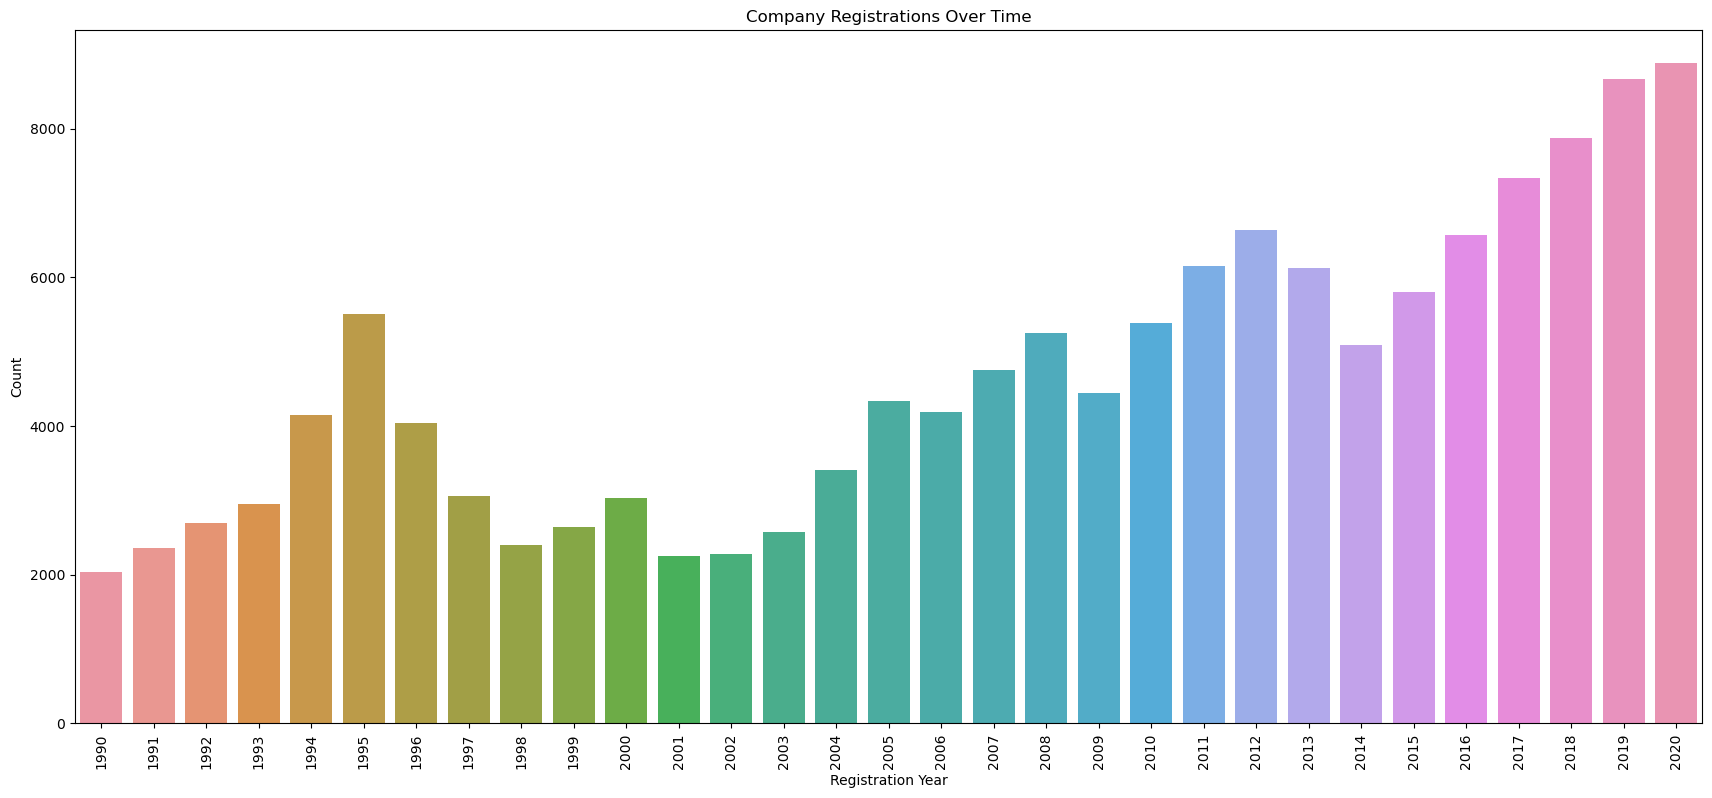

In [6]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

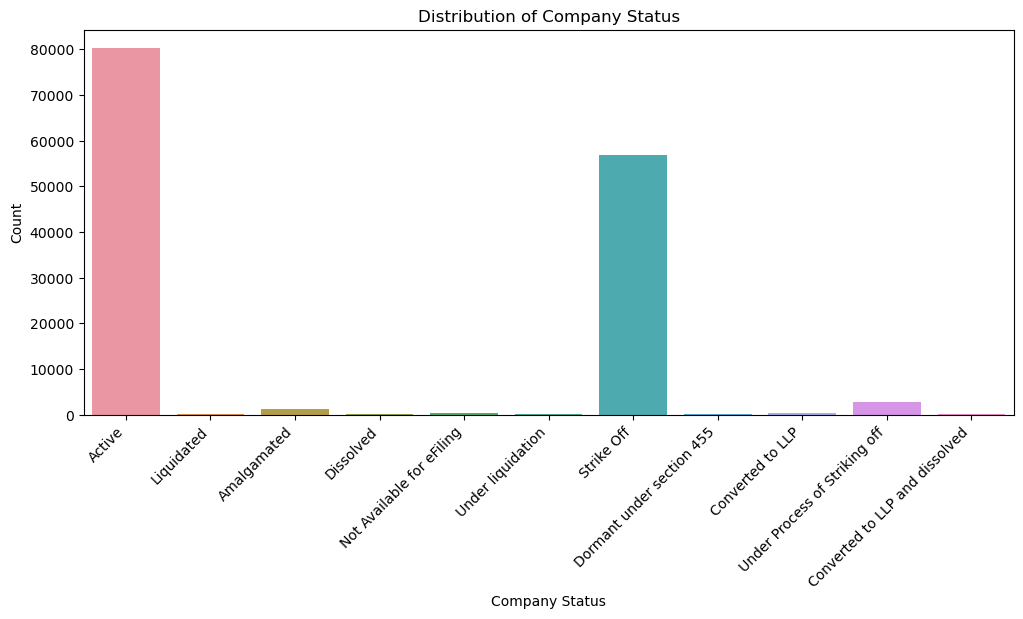

In [7]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

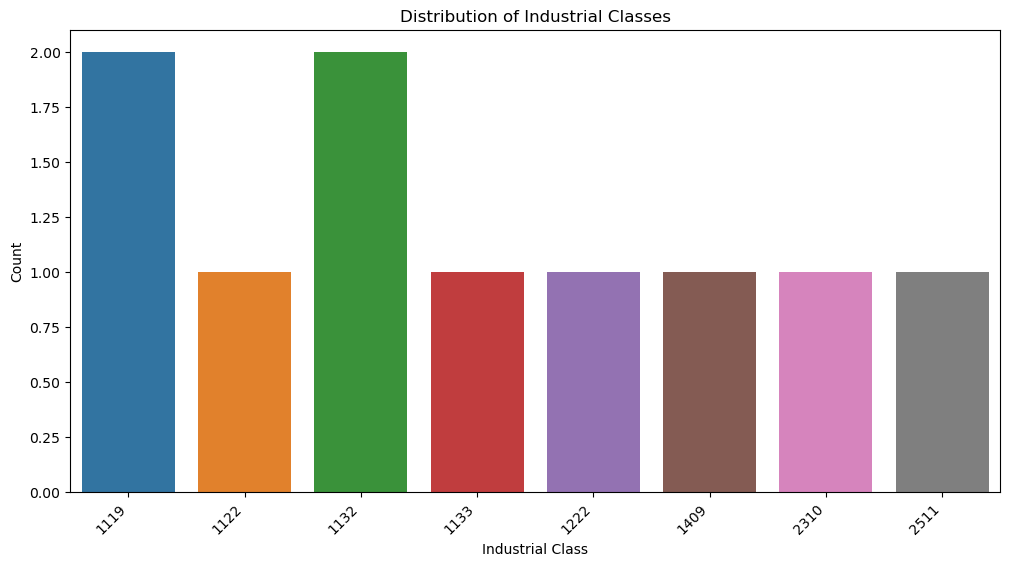

In [8]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

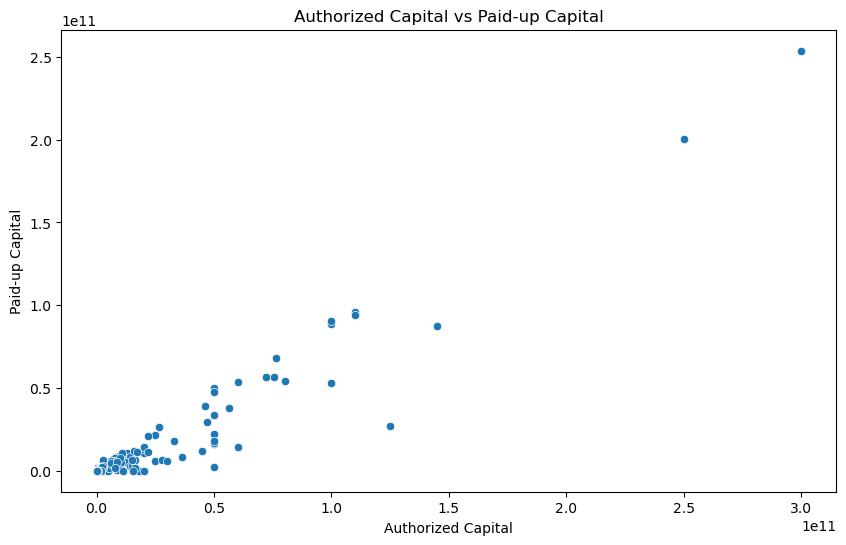

In [9]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [10]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee' nan
 'Unlimited Company']


In [12]:
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

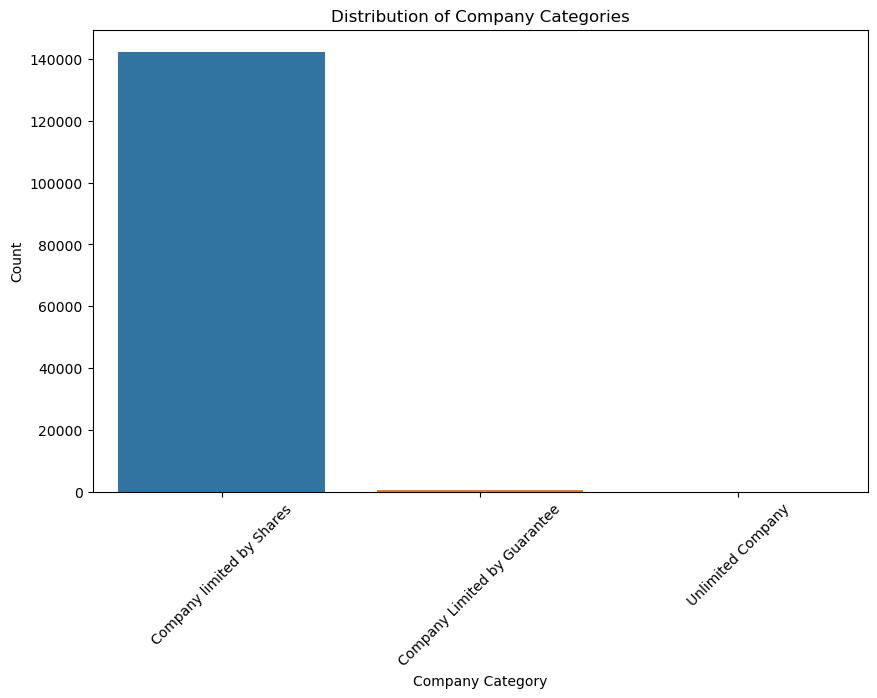

In [13]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

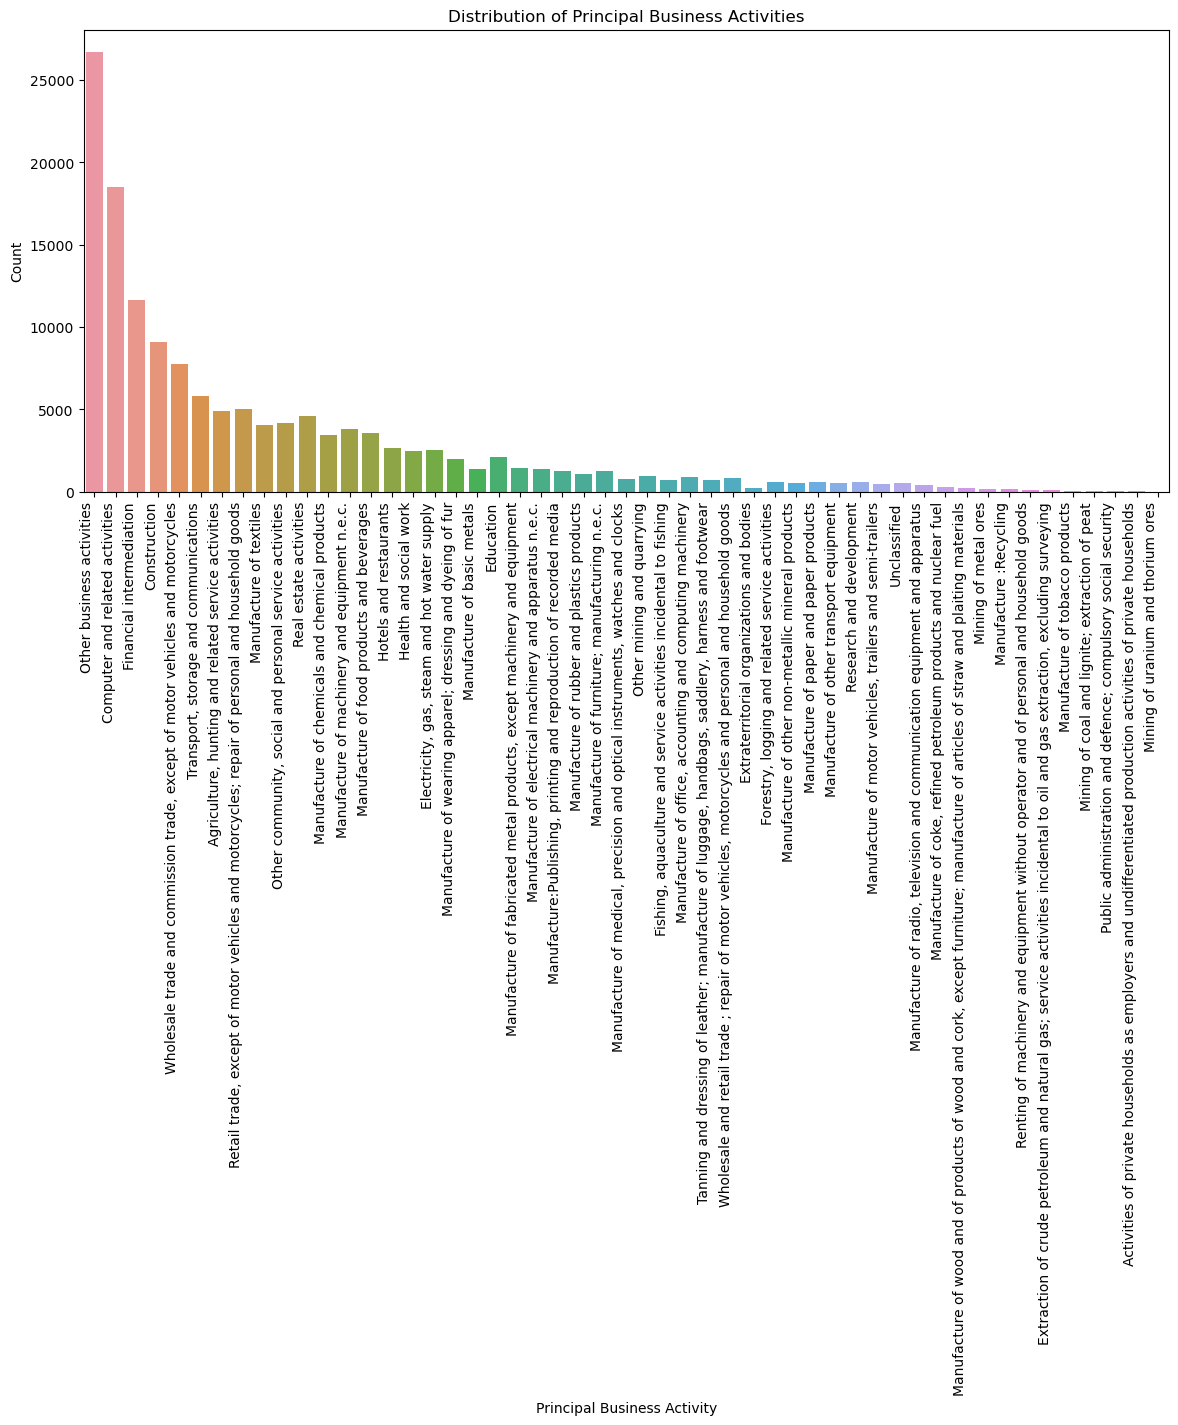

In [14]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

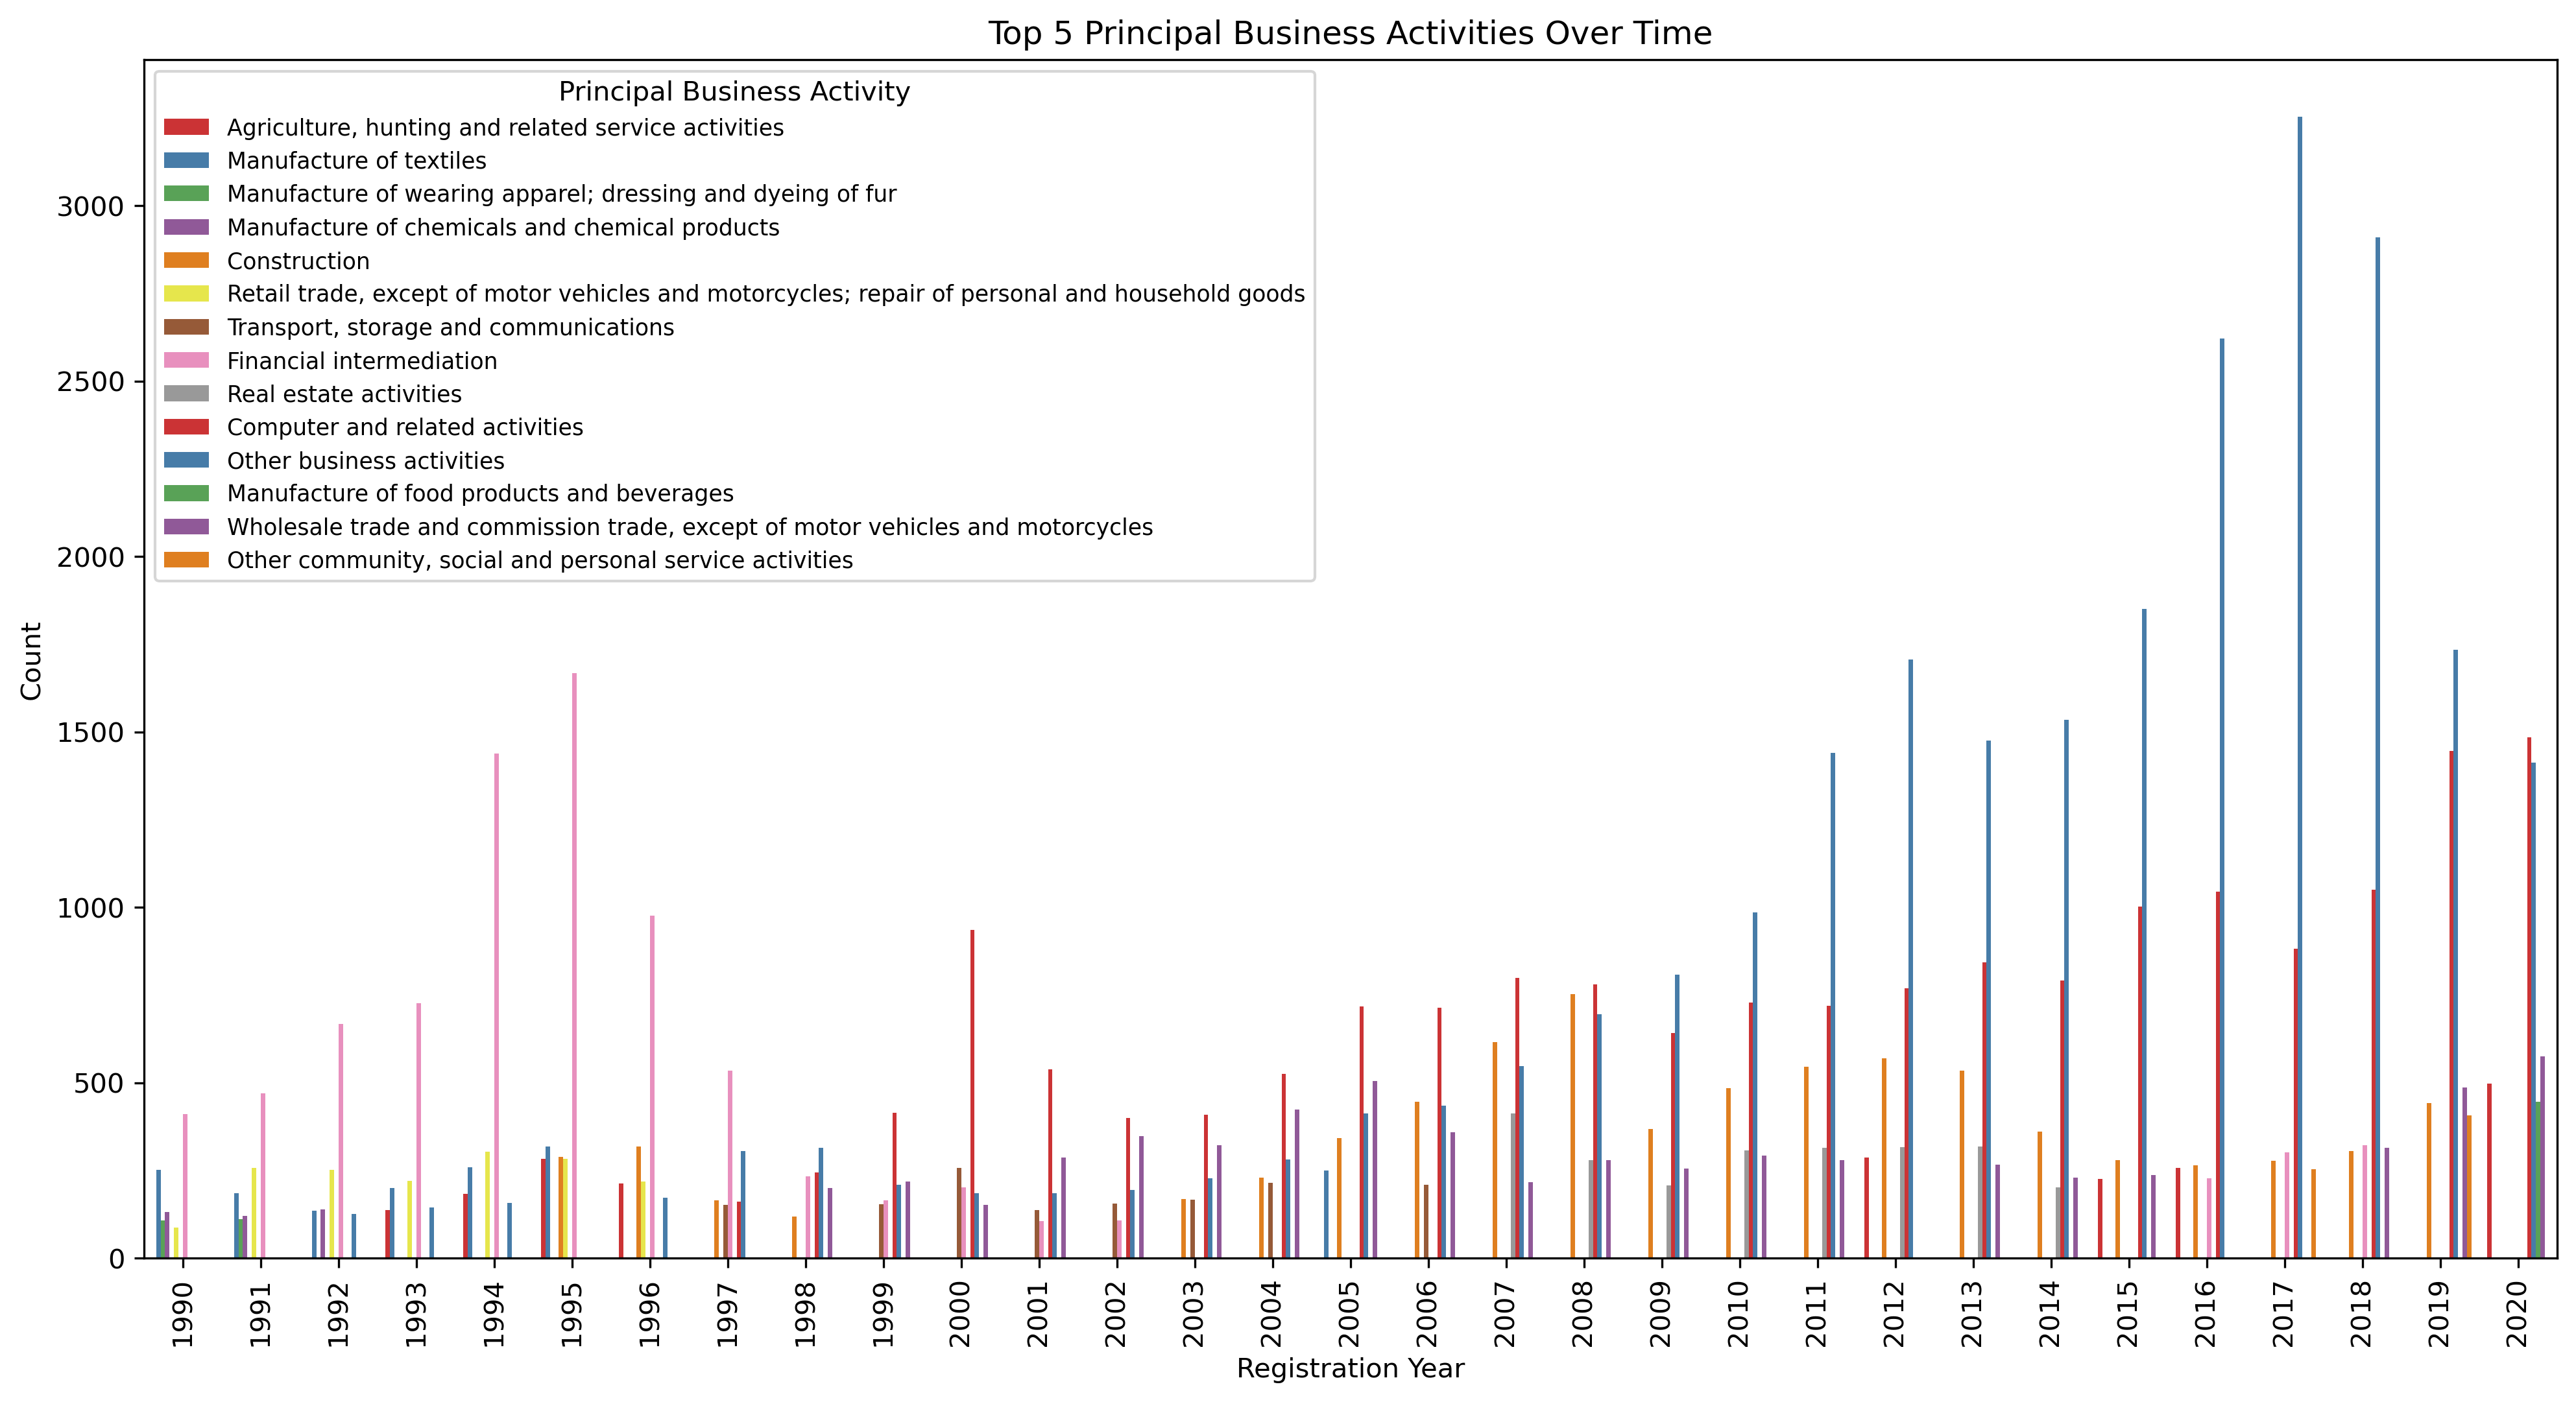

In [15]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [16]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                                                         16792
Computer and related activities                                                    8543
Construction                                                                       2884
Wholesale trade and commission trade, except of motor vehicles and motorcycles     2561
Financial intermediation                                                           2221
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


### Authorized capital

In [17]:
# Convert columns to appropriate data types
# Use .loc to ensure you're modifying the original DataFrame
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()

In [18]:
# Trend analysis of Authorized capital
# Ensure the DataFrame is sorted by the time column
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2

PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  Registration_Year  \
0     Activities of private households as employers ...               1983   
1     Activities of private households as employers ...               1984   
2     Activities of private households as employers ...               1995   
3     Activities of private households as employers ...               1997   
4     Activities of private households as employers ...               1999   
...                                                 ...                ...   
3057  Wholesale trade and commission trade, except o...               2069   
3058  Wholesale trade and commission trade, except o...               2070   
3059  Wholesale trade and commission trade, except o...               2071   
3060  Wholesale trade and commission trade, except o...               2072   
3061  Wholesale trade and commission trade, except o...               2073   

      CAPITAL_CHANGE  
0           0.000000  
1           0.000000  
2           0.000000  
3           0.000000  
4           0.000000  
...              ...  
3057        0.480000  
3058       20.736667  
3059        2.777778  
3060        0.419048  
3061       32.944444  

[3062 rows x 3 columns]

### Comparison Score

In [18]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df

Activity_1  \
0     Activities of private households as employers ...   
1     Activities of private households as employers ...   
2     Activities of private households as employers ...   
3     Activities of private households as employers ...   
4     Activities of private households as employers ...   
...                                                 ...   
1270              Transport, storage and communications   
1271              Transport, storage and communications   
1272                                       Unclassified   
1273                                       Unclassified   
1274  Wholesale and retail trade ; repair of motor v...   

                                             Activity_2  Comparison  
0     Agriculture, hunting and related service activ...    0.082051  
1                       Computer and related activities    0.091723  
2                                          Construction    0.020283  
3                                             Education    0.081839  
4          Electricity, gas, steam and hot water supply    0.002305  
...                                                 ...         ...  
1270  Wholesale and retail trade ; repair of motor v...    1.203357  
1271  Wholesale trade and commission trade, except o...    5.832200  
1272  Wholesale and retail trade ; repair of motor v...    0.245382  
1273  Wholesale trade and commission trade, except o...    1.189268  
1274  Wholesale trade and commission trade, except o...    4.846608  

[1275 rows x 3 columns]

### Liquidity Ratios

In [ ]:
# Liquidity Ratios: This calculates the liquidity ratio (authorized capital to paid-up capital) for each company.
# It is crucial for assessing the financial health of a company.
# Make sure 'df' is the original DataFrame or explicitly create a copy if it's a subset
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


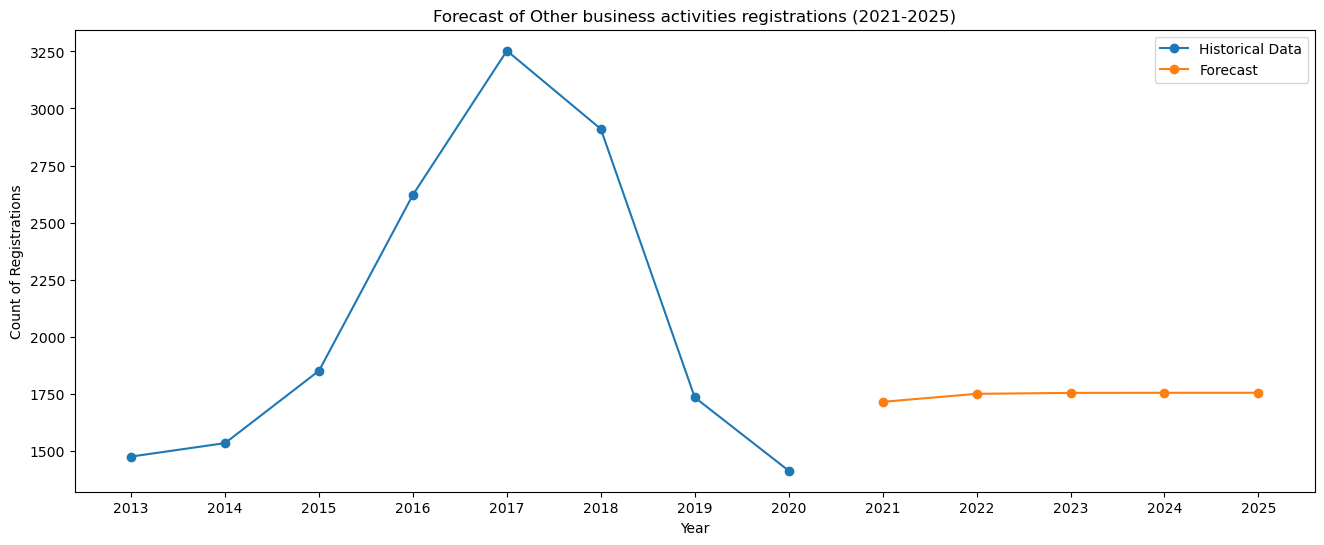

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    1714.778071
2022-01-01    1749.865209
2023-01-01    1753.944720
2024-01-01    1754.419037
2025-01-01    1754.474185
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


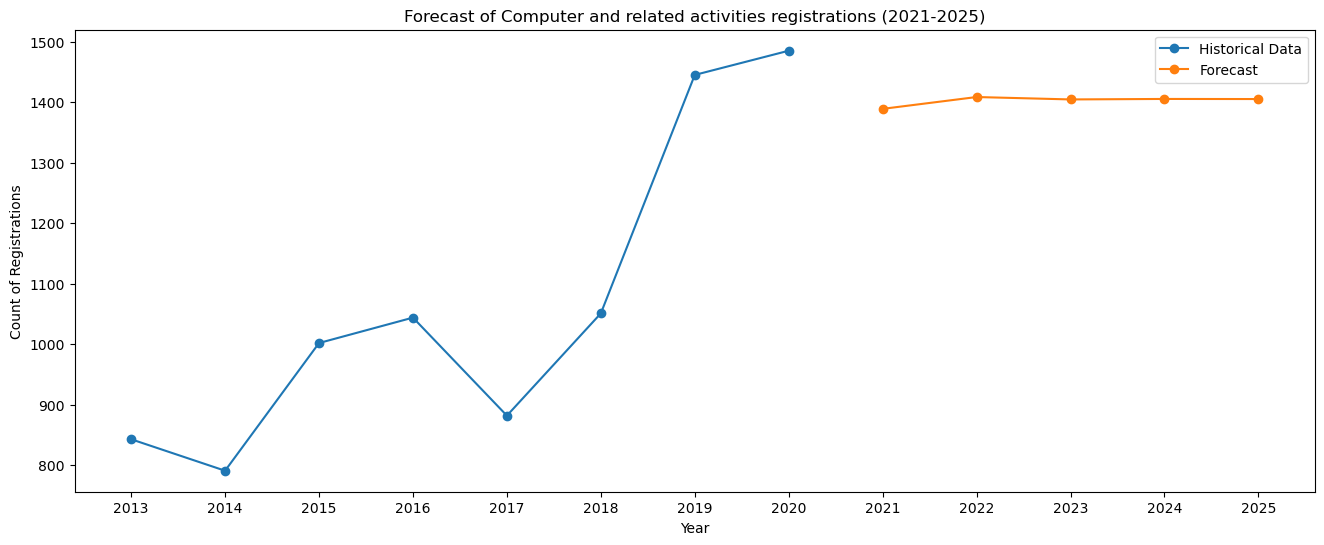

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    1388.935724
2022-01-01    1408.482718
2023-01-01    1404.505330
2024-01-01    1405.314642
2025-01-01    1405.149964
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

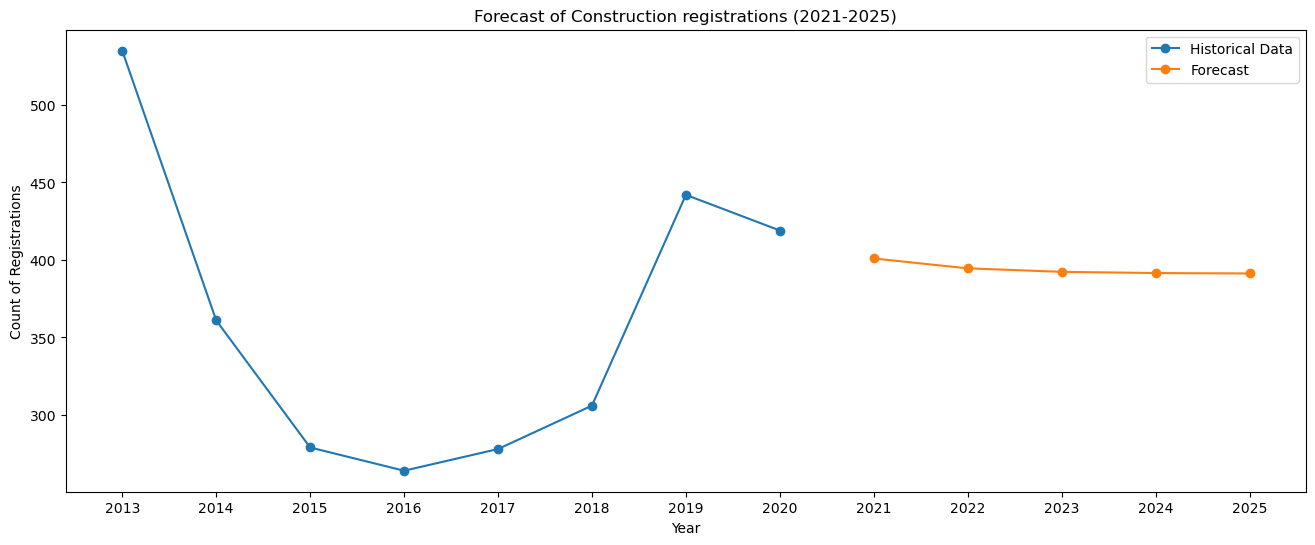

Forecasted registrations for Construction for 2021-2025:
2021-01-01    400.948083
2022-01-01    394.581617
2023-01-01    392.336322
2024-01-01    391.544462
2025-01-01    391.265192
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

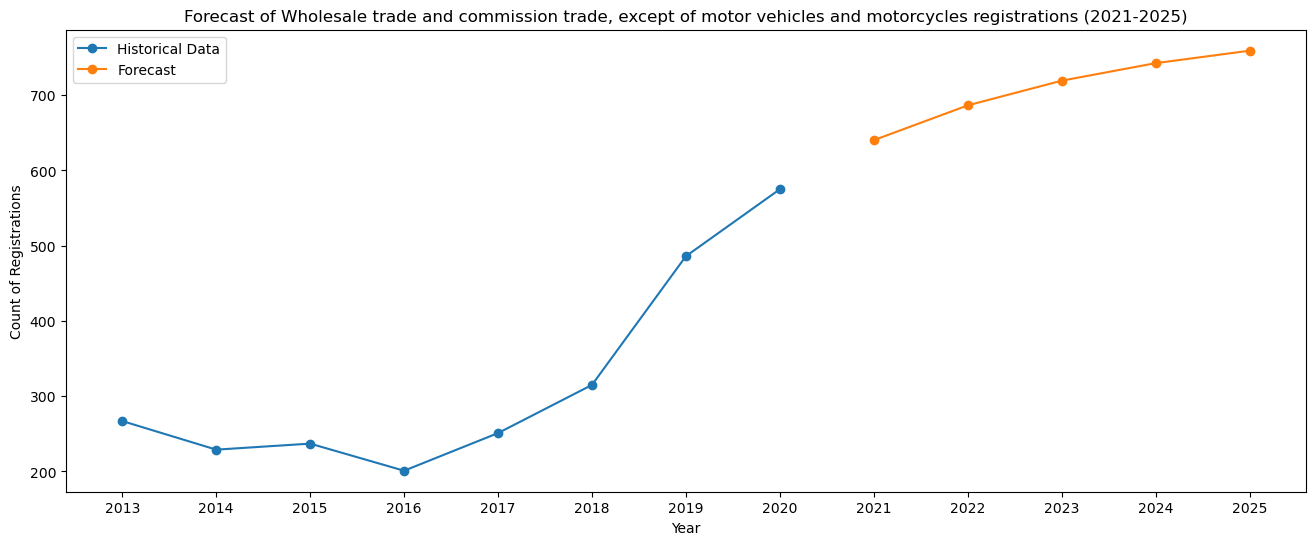

Forecasted registrations for Wholesale trade and commission trade, except of motor vehicles and motorcycles for 2021-2025:
2021-01-01    640.162348
2022-01-01    686.402716
2023-01-01    719.215709
2024-01-01    742.500396
2025-01-01    759.023626
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


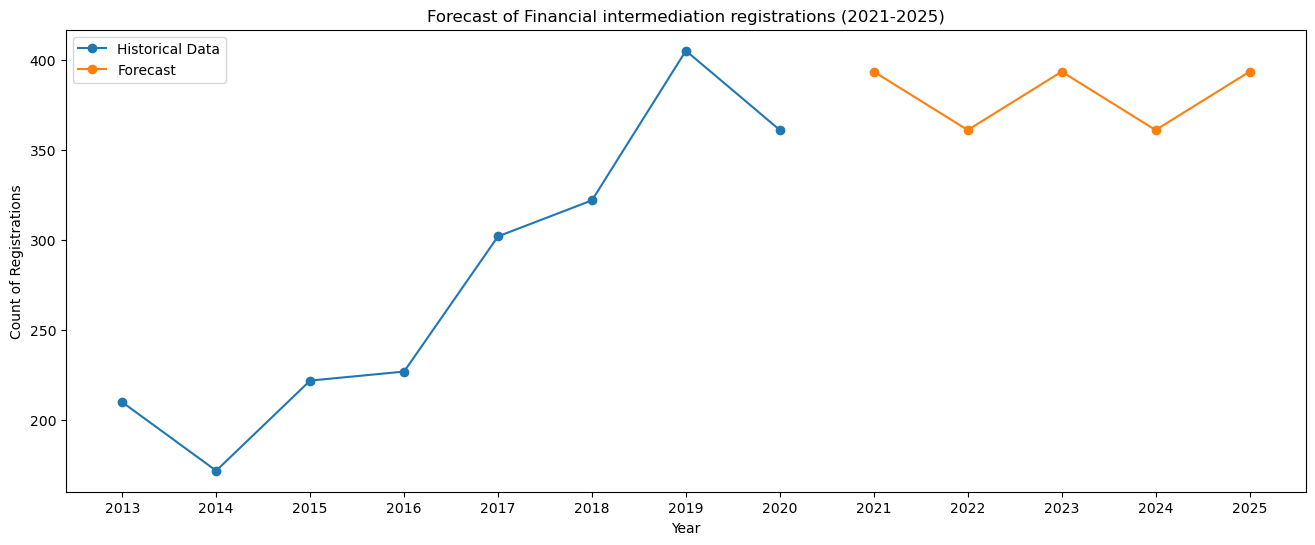

Forecasted registrations for Financial intermediation for 2021-2025:
2021-01-01    393.385690
2022-01-01    361.000577
2023-01-01    393.385112
2024-01-01    361.001155
2025-01-01    393.384535
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Construction',
    'Wholesale trade and commission trade, except of motor vehicles and motorcycles',
    'Financial intermediation'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)